# Linear regression with scikit-learn 📈📈

Let's come back to yesterday's dataset and change the objective : we would like to predict the Salary as a function of the other variables.

To do so, we'll train a linear regression model and evaluate its performances. You will see that the preprocessings are quite similar to the ones from yesterday's template (except that the label encoding step is skipped here, because our label is already a numeric variable !). We simplified a bit the dataset so you can focus on modelisation and performance evaluation. We also added a few figures, because EDA is an important step before training any model : it allows to understand better the relationship between the different variables in the dataset 🤓

## What will you learn in this course? 🧐🧐

This lecture is a follow-along demo to walk you through building a linear regression model in practice using sklearn!

* EDA
* Baseline model : simple linear regression
    * Training pipeline
    * Test pipeline
* Multivariate linear regression
    * Training pipeline
    * Test pipeline


## EDA

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE

In [2]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("src/Data.csv")
print("...Done.")
print()

Loading dataset...
...Done.



In [3]:
# Basic stats
data_desc = dataset.describe(include='all')
print(dataset.shape)
data_desc

(10, 4)


,Country,Age,Salary,Purchased
count,10,9.000000,10.000000,10
unique,3,NaN,NaN,2
top,France,NaN,NaN,Yes
freq,4,NaN,NaN,5
mean,NaN,38.777778,64300.000000,NaN
std,NaN,7.693793,11681.419244,NaN
min,NaN,27.000000,48000.000000,NaN
25%,NaN,35.000000,55000.000000,NaN
50%,NaN,38.000000,64000.000000,NaN
75%,NaN,44.000000,71250.000000,NaN


- Taget variable : Y = 'Salary'
- Explanatory variables : 'Country', 'Age', 'Purchased'
- Number of examples : 12

- Imputation of missing values : 'Age'
- Normalisation : 'Age'
- OHE : 'Country', 'Purchased'

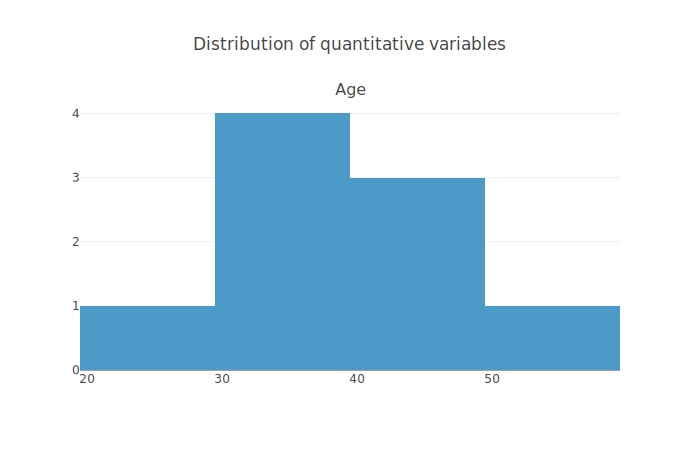

In [4]:
# Univariate analysis
from plotly.subplots import make_subplots

# Distribution of each numeric variable
num_features = ['Age']
fig1 = make_subplots(rows = len(num_features), cols = 1, subplot_titles = num_features)
for i in range(len(num_features)):
    fig1.add_trace(
        go.Histogram(
            x = dataset[num_features[i]], nbinsx = 4),
        row = i + 1,
        col = 1)
fig1.update_layout(
        title = go.layout.Title(text = "Distribution of quantitative variables", x = 0.5), showlegend = False, 
            autosize=False, height=500)
fig1.show()

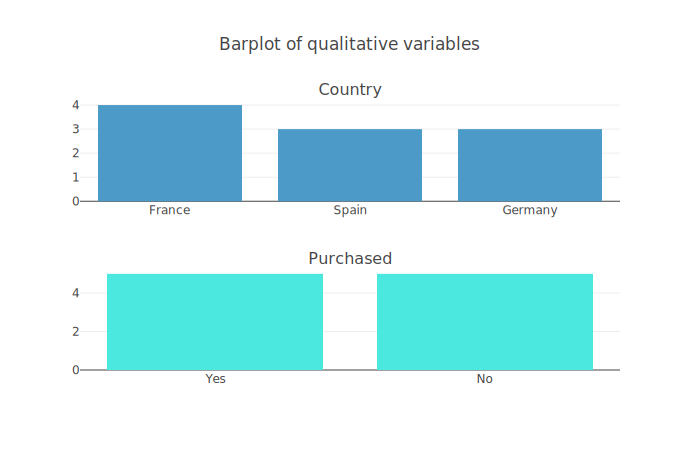

In [5]:
# Univariate analysis
from plotly.subplots import make_subplots

# Barplot of each qualitative variable
cat_features = ['Country', 'Purchased']
fig2 = make_subplots(rows = len(cat_features), cols = 1, subplot_titles = cat_features)
for i in range(len(cat_features)):
    
    x_coords = dataset[cat_features[i]].value_counts().index.tolist()
    y_coords = dataset[cat_features[i]].value_counts().tolist()
    
    fig2.add_trace(
        go.Bar(
            x = x_coords,
            y = y_coords),
        row = i + 1,
        col = 1)
fig2.update_layout(
        title = go.layout.Title(text = "Barplot of qualitative variables", x = 0.5), showlegend = False, 
            autosize=False, height=500)
fig2.show()

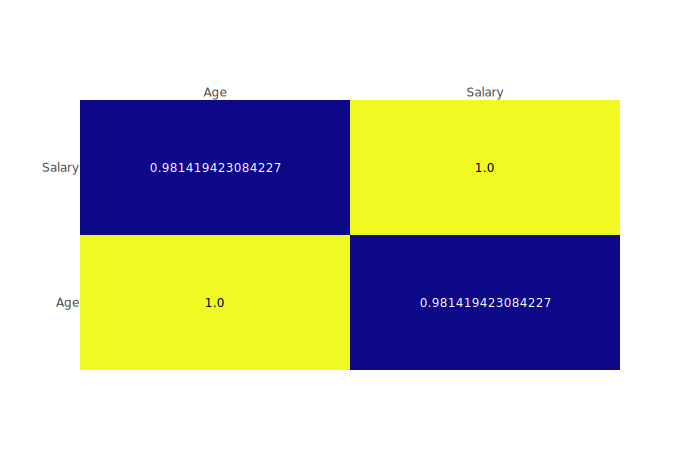

In [6]:
# Correlation matrix
corr_matrix = dataset.corr()

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.values.tolist(),
                                  y = corr_matrix.index.values.tolist())


fig.show()

There's a very strong correlation between the target and the Age variable ! This is a good news, it means that a linear model relating these two variables may be a good estimator of the salary 🙂

Let's analyze pairwise scatterplots to investigate the interdependencies between the variables :

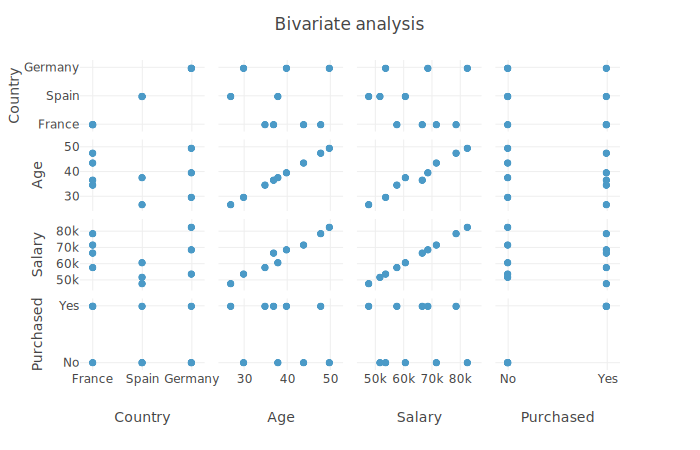

In [7]:
# Visualize pairwise dependencies
fig = px.scatter_matrix(dataset)
fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False, 
            autosize=False, height=800, width = 800)
fig.show()

## Baseline model : simple linear regression
Let's try a first basic model : simple linear regression with only one feature. We choose the age because we just noticed that it is strongly correlated to the salary.

In [8]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["Age"]
target_variable = "Salary"

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    72000
1    48000
2    54000
3    61000
4    69000
Name: Salary, dtype: int64

X :
    Age
0  44.0
1  27.0
2  30.0
3  38.0
4  40.0


In [9]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [10]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[40.]
 [37.]
 [27.]
 [nan]
 [48.]]
[[30.]
 [50.]]

[69000, 67000, 48000, 52000, 79000]
[54000, 83000]


## Training pipeline

In [11]:
# Missing values
print("Imputing missing values...")
print(X_train[0:5,:])
print()
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) 
print() 

Imputing missing values...
[[40.]
 [37.]
 [27.]
 [nan]
 [48.]]

...Done!
[[40.        ]
 [37.        ]
 [27.        ]
 [38.42857143]
 [48.        ]]



In [12]:
# Standardizing numerical features
print("Standardizing numerical features...")
print()
print(X_train[0:5,:])

# Normalization
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Standardizing numerical features...

[[40.        ]
 [37.        ]
 [27.        ]
 [38.42857143]
 [48.        ]]
...Done
[[ 0.27063731]
 [-0.24603392]
 [-1.96827133]
 [ 0.        ]
 [ 1.64842723]]


In [13]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [14]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[65559.7003632  61150.27239709 46452.17917676 63250.
 77318.17493947 62620.08171913 71438.93765133 58210.65375303]



# Test pipeline

In [15]:
# Missing values
print("Imputing missing values...")
print(X_test[0:5,:])
print()

X_test = imputer.transform(X_test)
print("...Done!")
print(X_test[0:5,:]) 
print() 

Imputing missing values...
[[30.]
 [50.]]

...Done!
[[30.]
 [50.]]



In [16]:
# Standardizing numerical features
print("Standardizing numerical features...")
print()
print(X_test[0:5,:])

X_test = scaler.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Standardizing numerical features...

[[30.]
 [50.]]
...Done
[[-1.4516001 ]
 [ 1.99287472]]


In [17]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[50861.60714286 80257.79358354]



In [18]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.7631622918222598
R2 score on test set :  0.9586939221016253


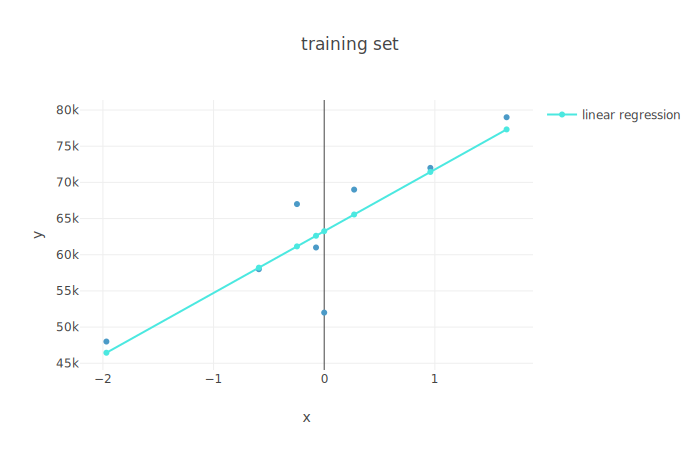

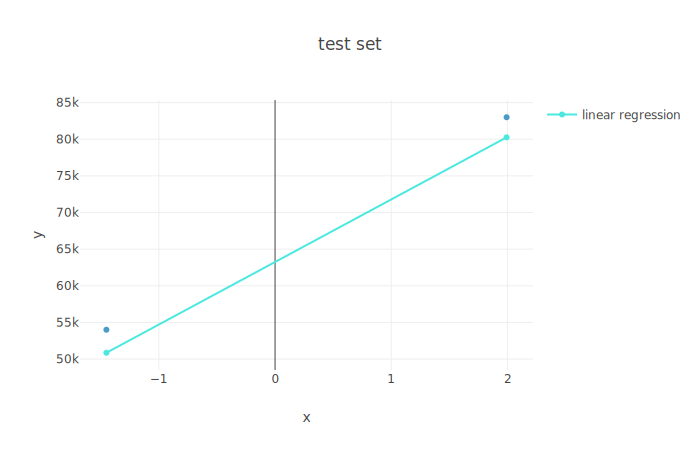

In [19]:
# Visualize the model
# Visualize predictions on training Set
fig = px.scatter(x = X_train.flatten().tolist(), y = Y_train, title = "training set")
fig.add_trace(go.Scatter(x = X_train.flatten().tolist(), y = Y_train_pred, name = "linear regression"))
fig.show()

# Visualize predictions on test Set
fig = px.scatter(x = X_test.flatten().tolist(), y = Y_test, title = "test set")
fig.add_trace(go.Scatter(x = X_test.flatten().tolist(), y = Y_test_pred, name = "linear regression"))
fig.show()

In the above example all assumptions needed to train a simple linear regression model are verified.

* There seems to be a linear relation between $Y$ and the feature $X$
* The deviation between the prediction and the actual values of $Y$, i.e. the residuals, seem to be comparable accross the values of $Y$ (this is Homoscedaticity).
* There does not seem to be any autocorrelation going on with the residuals, they seem to be randomly distributed accross all values of $Y$

In addition to that, our model seems to be a good predictor based on our training samples.

## Multivariate linear regression
Let's train a multivariate model by adding the categorical features : Country and Purchased.

In [20]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["Country", "Age", "Purchased"]
target_variable = "Salary"

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    72000
1    48000
2    54000
3    61000
4    69000
Name: Salary, dtype: int64

X :
   Country   Age Purchased
0   France  44.0        No
1    Spain  27.0       Yes
2  Germany  30.0        No
3    Spain  38.0        No
4  Germany  40.0       Yes


In [21]:
# Automatically detect positions of numeric/categorical features
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['Age']  at positions  [1]
Found categorical features  ['Country', 'Purchased']  at positions  [0, 2]


In [22]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [23]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['Germany' 40.0 'Yes']
 ['France' 37.0 'Yes']
 ['Spain' 27.0 'Yes']
 ['Spain' nan 'No']
 ['France' 48.0 'Yes']]
[['Germany' 30.0 'No']
 ['Germany' 50.0 'No']]

[69000, 67000, 48000, 52000, 79000]
[54000, 83000]


## Training pipeline

In [24]:
# Missing values
print("Imputing missing values...")
print(X_train[0:5,:])
print()
imputer = SimpleImputer(strategy="mean")
X_train[:,numeric_indices] = imputer.fit_transform(X_train[:,numeric_indices])
print("...Fini!")
print(X_train[0:5,:]) 
print() 

Imputing missing values...
[['Germany' 40.0 'Yes']
 ['France' 37.0 'Yes']
 ['Spain' 27.0 'Yes']
 ['Spain' nan 'No']
 ['France' 48.0 'Yes']]

...Fini!
[['Germany' 40.0 'Yes']
 ['France' 37.0 'Yes']
 ['Spain' 27.0 'Yes']
 ['Spain' 38.42857142857143 'No']
 ['France' 48.0 'Yes']]



In [25]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...

[['Germany' 40.0 'Yes']
 ['France' 37.0 'Yes']
 ['Spain' 27.0 'Yes']
 ['Spain' 38.42857142857143 'No']
 ['France' 48.0 'Yes']]
...Done
[[ 1.          0.          1.          0.27063731]
 [ 0.          0.          1.         -0.24603392]
 [ 0.          1.          1.         -1.96827133]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          1.64842723]]


In [26]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [27]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[69000.         64690.01772977 46297.16942234 57628.38617903
 78907.85675999 57074.44439863 70297.16942234 62104.95608791]



# Test pipeline

In [28]:
# Missing values
print("Imputing missing values...")
print(X_test[0:5,:])
print()

X_test[:,numeric_indices] = imputer.transform(X_test[:,numeric_indices])
print("...Done!")
print(X_test[0:5,:]) 
print() 

Imputing missing values...
[['Germany' 30.0 'No']
 ['Germany' 50.0 'No']]

...Done!
[['Germany' 30.0 'No']
 ['Germany' 50.0 'No']]



In [29]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_test[0:5,:])

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...

[['Germany' 30.0 'No']
 ['Germany' 50.0 'No']]
...Done
[[ 1.          0.          0.         -1.4516001 ]
 [ 1.          0.          0.          1.99287472]]


In [30]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[52634.12773677 78484.74415536]



In [31]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9016592604305448
R2 score on test set :  0.9470793284613951
